# Kaggle
## Top 50 Spotify Songs - 2019
https://www.kaggle.com/leonardopena/top50spotify2019

In [1]:
# Importing all required libraries. 
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
import warnings

# Disabling in-line warnings in the Notebook. 
warnings.filterwarnings('ignore')

In [2]:
# read the csv file in library
spotify = pd.read_csv("top50.csv", encoding='ISO-8859-1')

# Data Cleaning

In [3]:
spotify.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 14 columns):
Unnamed: 0          50 non-null int64
Track.Name          50 non-null object
Artist.Name         50 non-null object
Genre               50 non-null object
Beats.Per.Minute    50 non-null int64
Energy              50 non-null int64
Danceability        50 non-null int64
Loudness..dB..      50 non-null int64
Liveness            50 non-null int64
Valence.            50 non-null int64
Length.             50 non-null int64
Acousticness..      50 non-null int64
Speechiness.        50 non-null int64
Popularity          50 non-null int64
dtypes: int64(11), object(3)
memory usage: 5.5+ KB


In [4]:
# Clean columns - remove the dots from column names
spotify.columns = spotify.columns.str.replace('.','')

In [5]:
spotify.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 14 columns):
Unnamed: 0        50 non-null int64
TrackName         50 non-null object
ArtistName        50 non-null object
Genre             50 non-null object
BeatsPerMinute    50 non-null int64
Energy            50 non-null int64
Danceability      50 non-null int64
LoudnessdB        50 non-null int64
Liveness          50 non-null int64
Valence           50 non-null int64
Length            50 non-null int64
Acousticness      50 non-null int64
Speechiness       50 non-null int64
Popularity        50 non-null int64
dtypes: int64(11), object(3)
memory usage: 5.5+ KB


In [6]:
# disply the rows of the raw data
spotify.head(50)

,Unnamed: 0,TrackName,ArtistName,Genre,BeatsPerMinute,Energy,Danceability,LoudnessdB,Liveness,Valence,Length,Acousticness,Speechiness,Popularity
0,1,Señorita,Shawn Mendes,canadian pop,117,55,76,-6,8,75,191,4,3,79
1,2,China,Anuel AA,reggaeton flow,105,81,79,-4,8,61,302,8,9,92
2,3,boyfriend (with Social House),Ariana Grande,dance pop,190,80,40,-4,16,70,186,12,46,85
3,4,Beautiful People (feat. Khalid),Ed Sheeran,pop,93,65,64,-8,8,55,198,12,19,86
4,5,Goodbyes (Feat. Young Thug),Post Malone,dfw rap,150,65,58,-4,11,18,175,45,7,94
5,6,I Don't Care (with Justin Bieber),Ed Sheeran,pop,102,68,80,-5,9,84,220,9,4,84
6,7,Ransom,Lil Tecca,trap music,180,64,75,-6,7,23,131,2,29,92
7,8,How Do You Sleep?,Sam Smith,pop,111,68,48,-5,8,35,202,15,9,90
8,9,Old Town Road - Remix,Lil Nas X,country rap,136,62,88,-6,11,64,157,5,10,87
9,10,bad guy,Billie Eilish,electropop,135,43,70,-11,10,56,194,33,38,95


In [7]:
# dimensions of dataset
spotify.shape

(50, 14)

In [8]:
#Calculating the number of songs of each genre
print(type(spotify['Genre']))
popular_genre=spotify.groupby('Genre').size().unique
print(popular_genre)
genre_list=spotify['Genre'].values.tolist()

<class 'pandas.core.series.Series'>
<bound method Series.unique of Genre
atl hip hop         1
australian pop      1
big room            1
boy band            1
brostep             2
canadian hip hop    3
canadian pop        2
country rap         2
dance pop           8
dfw rap             2
edm                 3
electropop          2
escape room         1
latin               5
panamanian pop      2
pop                 7
pop house           1
r&b en espanol      1
reggaeton           2
reggaeton flow      2
trap music          1
dtype: int64>


In [9]:
#Calculating the number of songs by each of the artists
print(spotify.groupby('ArtistName').size())
popular_artist=spotify.groupby('ArtistName').size()
print(popular_artist)
artist_list=spotify['ArtistName'].values.tolist()

ArtistName
Ali Gatie           1
Anuel AA            1
Ariana Grande       2
Bad Bunny           1
Billie Eilish       2
Chris Brown         1
DJ Snake            1
Daddy Yankee        1
Drake               1
Ed Sheeran          4
J Balvin            2
Jhay Cortez         1
Jonas Brothers      1
Katy Perry          1
Khalid              1
Kygo                1
Lady Gaga           1
Lauv                1
Lewis Capaldi       1
Lil Nas X           2
Lil Tecca           1
Lizzo               1
Lunay               1
MEDUZA              1
Maluma              1
Marshmello          2
Martin Garrix       1
Nicky Jam           1
Post Malone         2
ROSALÍA             1
Sam Smith           1
Sech                2
Shawn Mendes        2
Taylor Swift        1
The Chainsmokers    2
Tones and I         1
Y2K                 1
Young Thug          1
dtype: int64
ArtistName
Ali Gatie           1
Anuel AA            1
Ariana Grande       2
Bad Bunny           1
Billie Eilish       2
Chris Brown        

In [10]:
# Overall summary statistics of the numeric fields in the Dataframe.
spotify.describe()

,Unnamed: 0,BeatsPerMinute,Energy,Danceability,LoudnessdB,Liveness,Valence,Length,Acousticness,Speechiness,Popularity
count,50.00000,50.000000,50.000000,50.00000,50.000000,50.000000,50.000000,50.000000,50.000000,50.000000,50.000000
mean,25.50000,120.060000,64.060000,71.38000,-5.660000,14.660000,54.600000,200.960000,22.160000,12.480000,87.500000
std,14.57738,30.898392,14.231913,11.92988,2.056448,11.118306,22.336024,39.143879,18.995553,11.161596,4.491489
min,1.00000,85.000000,32.000000,29.00000,-11.000000,5.000000,10.000000,115.000000,1.000000,3.000000,70.000000
25%,13.25000,96.000000,55.250000,67.00000,-6.750000,8.000000,38.250000,176.750000,8.250000,5.000000,86.000000
50%,25.50000,104.500000,66.500000,73.50000,-6.000000,11.000000,55.500000,198.000000,15.000000,7.000000,88.000000
75%,37.75000,137.500000,74.750000,79.75000,-4.000000,15.750000,69.500000,217.500000,33.750000,15.000000,90.750000
max,50.00000,190.000000,88.000000,90.00000,-2.000000,58.000000,95.000000,309.000000,75.000000,46.000000,95.000000


# Plots and Stats

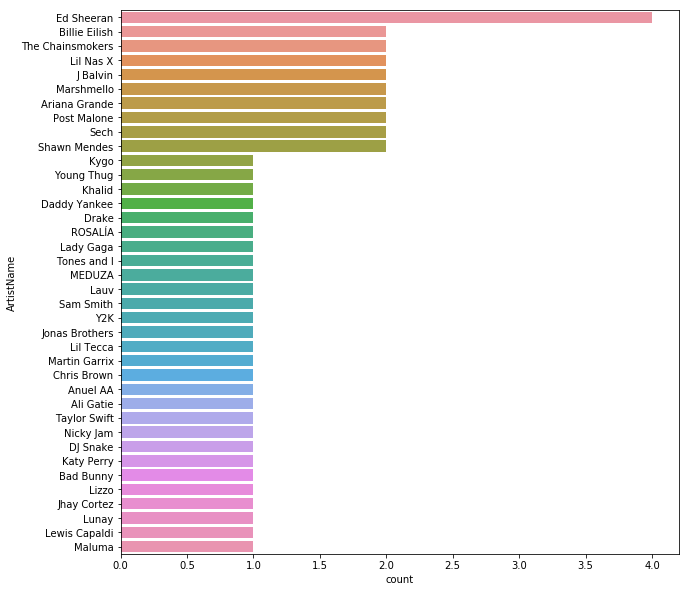

In [11]:
# number of songs of each artist
plt.figure(figsize=(10,10))
sns.countplot(y='ArtistName', data=spotify, order=spotify.ArtistName.value_counts().index)
plt.show()

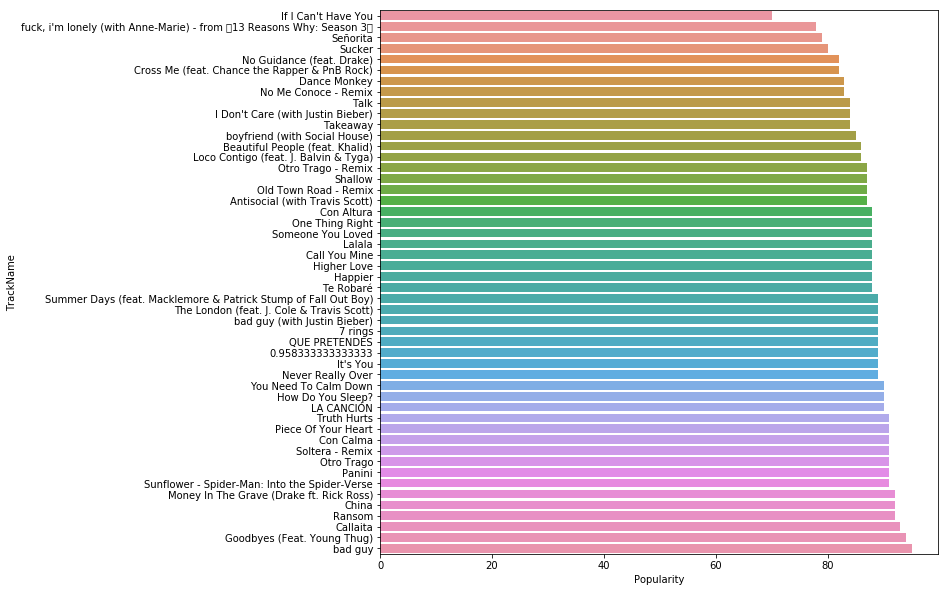

In [12]:
plt.figure(figsize=(10,10))

# sorting track by popularity
order=spotify.groupby('TrackName')['Popularity'].mean().sort_values().index;
sns.barplot(x='Popularity', y='TrackName', data=spotify, order=order)
plt.show()

In [13]:
spotify.pivot_table(index = ['Genre','TrackName'], values = ['Popularity'], aggfunc = 'max')

Popularity
Genre            TrackName                                                     
atl hip hop      The London (feat. J. Cole & Travis Scott)                   89
australian pop   Dance Monkey                                                83
big room         Summer Days (feat. Macklemore & Patrick Stump o...          89
boy band         Sucker                                                      80
brostep          Happier                                                     88
                 One Thing Right                                             88
canadian hip hop It's You                                                    89
                 Lalala                                                      88
                 Money In The Grave (Drake ft. Rick Ross)                    92
canadian pop     If I Can't Have You                                         70
                 Señorita                                                    79
country rap      Old Town Road - Remix                                       87
                 Panini                                                      91
dance pop        7 rings                                                     89
                 Loco Contigo (feat. J. Balvin & Tyga)                       86
                 Never Really Over                                           89
                 No Guidance (feat. Drake)                                   82
                 Shallow                                                     87
                 You Need To Calm Down                                       90
                 boyfriend (with Social House)                               85
                 fuck, i'm lonely (with Anne-Marie) - from 13 R...          78
dfw rap          Goodbyes (Feat. Young Thug)                                 94
                 Sunflower - Spider-Man: Into the Spider-Verse               91
edm              Call You Mine                                               88
                 Higher Love                                                 88
                 Takeaway                                                    84
electropop       bad guy                                                     95
                 bad guy (with Justin Bieber)                                89
escape room      Truth Hurts                                                 91
latin            Con Calma                                                   91
                 LA CANCIÓN                                                  90
                 QUE PRETENDES                                               89
                 Soltera - Remix                                             91
                 Te Robaré                                                   88
panamanian pop   Otro Trago                                                  91
                 Otro Trago - Remix                                          87
pop              Antisocial (with Travis Scott)                              87
                 Beautiful People (feat. Khalid)                             86
                 Cross Me (feat. Chance the Rapper & PnB Rock)               82
                 How Do You Sleep?                                           90
                 I Don't Care (with Justin Bieber)                           84
                 Someone You Loved                                           88
                 Talk                                                        84
pop house        Piece Of Your Heart                                         91
r&b en espanol   Con Altura                                                  88
reggaeton        0.958333333333333                                           89
                 Callaita                                                    93
reggaeton flow   China                                                       92
                 No Me Conoce - Remix                                

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20]), <a list of 21 Text xticklabel objects>)

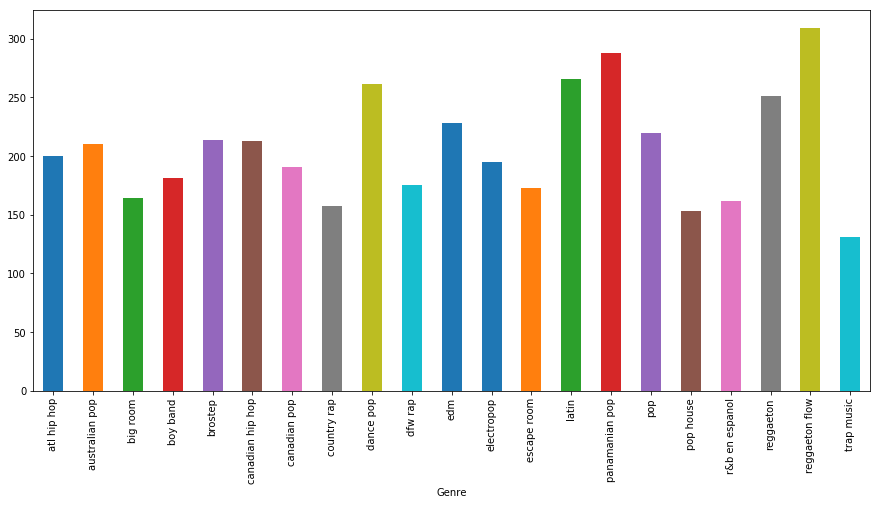

In [14]:
# Analyse the length of the music genre  
fig = plt.figure(figsize = (15,7))
spotify.groupby(['Genre'])['Length'].agg(max).plot(kind = 'bar')
plt.xticks(rotation=90)

As shown in histogram, the genre 'reggaeton flow' has the maximum length and 'trap music' has the minimum length. 

Skew checks by what degree the data deviates from the normal distribution. If the data deviates a lot then the accuracy in models could not get properly. Boxcox transformations are used to convert the skewed data to a normally distributed data.

Unnamed: 0        0.000000
BeatsPerMinute    0.854504
Energy           -0.453199
Danceability     -1.379891
LoudnessdB       -0.831915
Liveness          2.203937
Valence          -0.046490
Length            0.748554
Acousticness      1.135290
Speechiness       1.377581
Popularity       -1.503434
dtype: float64


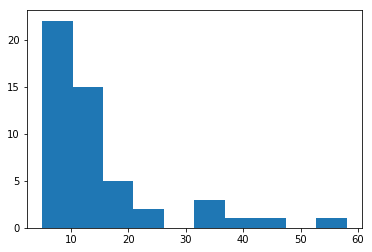

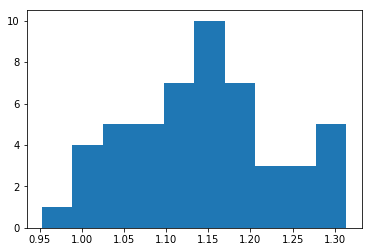

In [15]:
#Finding out the skew for each attribute
skew=spotify.skew()
print(skew)
# Removing the skew by using the boxcox transformations
transform=np.asarray(spotify[['Liveness']].values)
spotify_transform = stats.boxcox(transform)[0]
# Plotting a histogram to show the difference 
plt.hist(spotify['Liveness'],bins=10) #original data
plt.show()
plt.hist(spotify_transform,bins=10) #corrected skew data
plt.show()

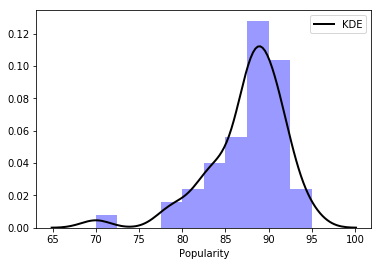

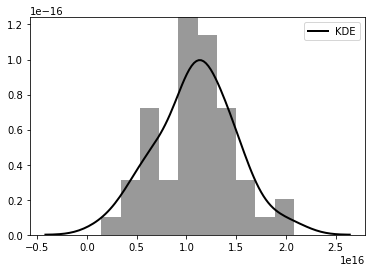

In [16]:
transform1=np.asarray(spotify[['Popularity']].values)
spotify_transform1 = stats.boxcox(transform1)[0]
# Plotting a histogram to show the difference between the original popularity and corrected skew data
sns.distplot(spotify['Popularity'],bins=10,kde=True,kde_kws={"color": "k", "lw": 2, "label": "KDE"},color='blue')
plt.show()
sns.distplot(spotify_transform1,bins=10,kde=True,kde_kws={"color": "k", "lw": 2, "label": "KDE"},color='black') #corrected skew data
plt.show()

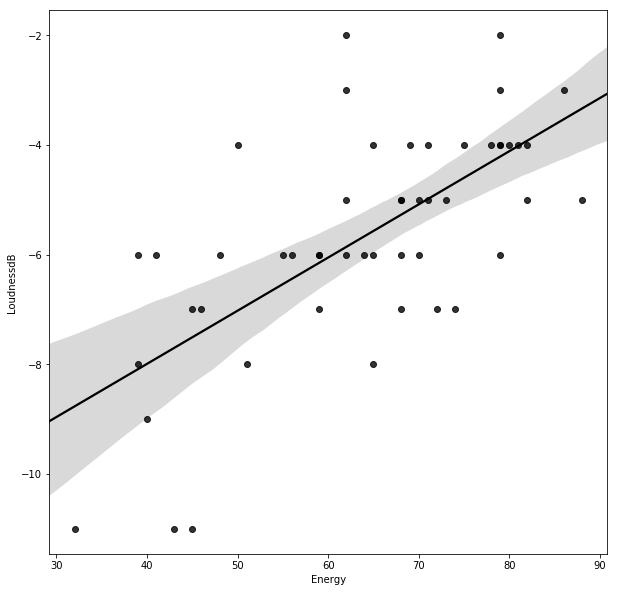

In [17]:
# Analysing the relationship between energy and loudness
fig=plt.subplots(figsize=(10,10))
sns.regplot(x='Energy',y='LoudnessdB',data=spotify,color='black')

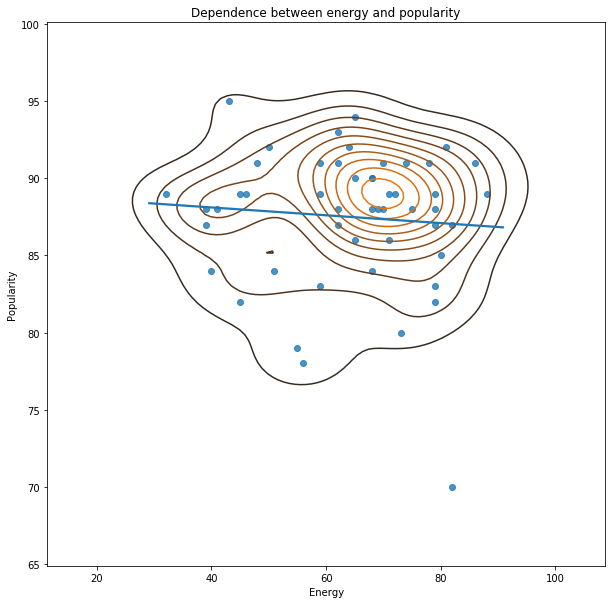

In [18]:
# Analysing the dependence between energy and popularity
fig=plt.subplots(figsize=(10,10))
plt.title('Dependence between energy and popularity')
sns.regplot(x='Energy', y='Popularity',
            ci=None, data=spotify)
sns.kdeplot(spotify.Energy,spotify.Popularity)

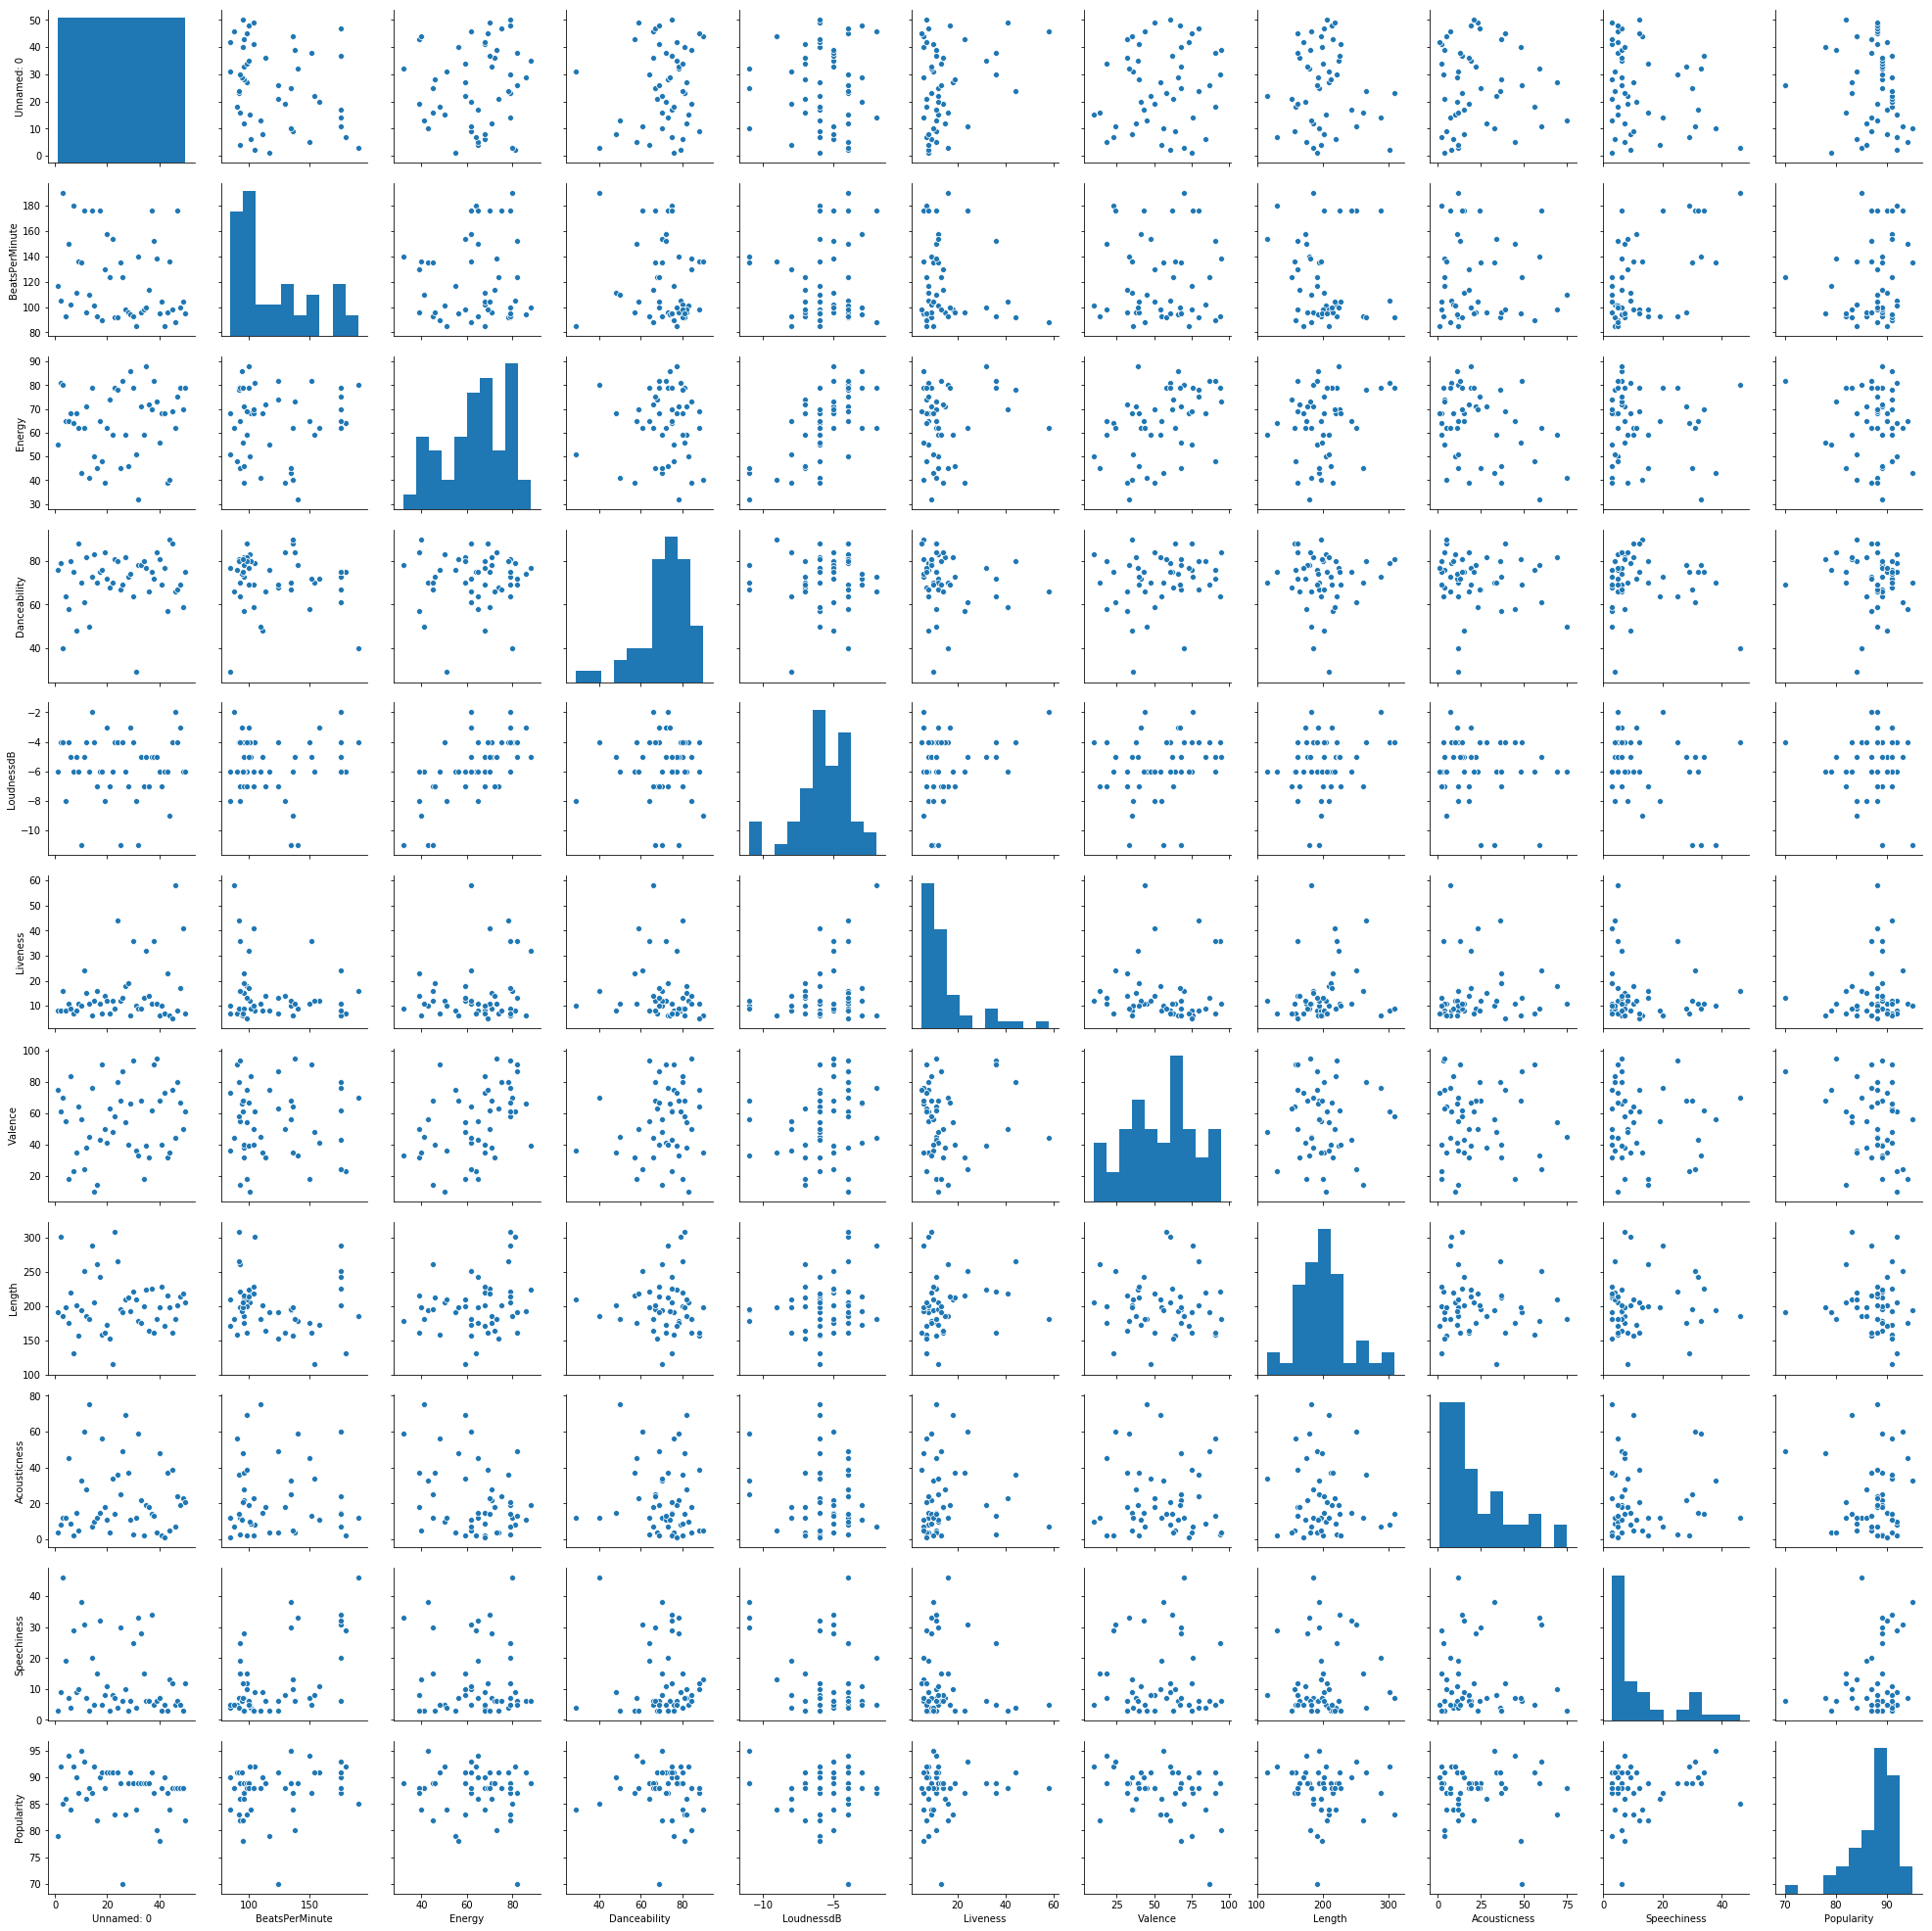

In [19]:
# Plot a pairwise relationships in a dataset
sns.pairplot(spotify)
plt.show()

In [20]:
# measure the degree of association between two variables 
# using spearman rank correlation
pd.set_option('precision', 3)
corr = spotify.corr(method='spearman')
print(corr)

                Unnamed: 0  BeatsPerMinute  Energy  Danceability  LoudnessdB  \
Unnamed: 0           1.000          -0.263   0.132         0.053      -0.014   
BeatsPerMinute      -0.263           1.000   0.012        -0.092       0.014   
Energy               0.132           0.012   1.000        -0.049       0.635   
Danceability         0.053          -0.092  -0.049         1.000       0.009   
LoudnessdB          -0.014           0.014   0.635         0.009       1.000   
Liveness             0.102          -0.033   0.013        -0.261       0.114   
Valence              0.113          -0.048   0.467         0.155       0.317   
Length               0.045          -0.198   0.189        -0.079       0.165   
Acousticness         0.058          -0.010  -0.211        -0.128      -0.040   
Speechiness         -0.232           0.392  -0.035         0.104      -0.063   
Popularity          -0.221           0.217  -0.044        -0.141       0.072   

                Liveness  Valence  Leng

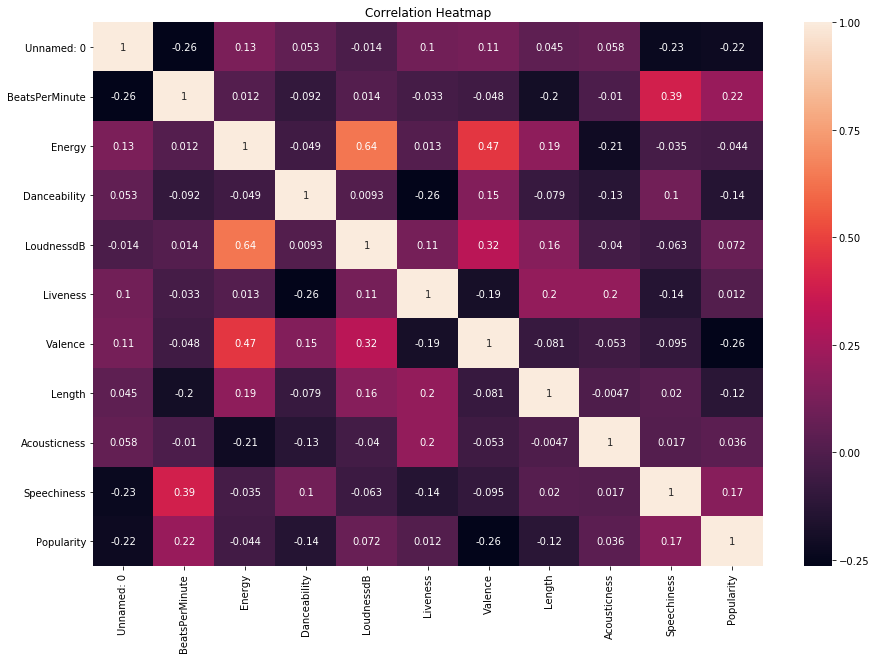

In [21]:
# data representation using heatmap
plt.figure(figsize=(15,10))
plt.title('Correlation Heatmap')
sns.heatmap(corr, annot=True)
plt.show()

When two variables are highly correlated with each other, they tend to have higher variance in both the variables. So, high correlations make it hard to estimate the actual effect of each variable. <br><br>
As shown in heatmap <br>
- Energy and Valence are highly correlated with each other
- Energy and LoudnessdB are highly correlated with each other

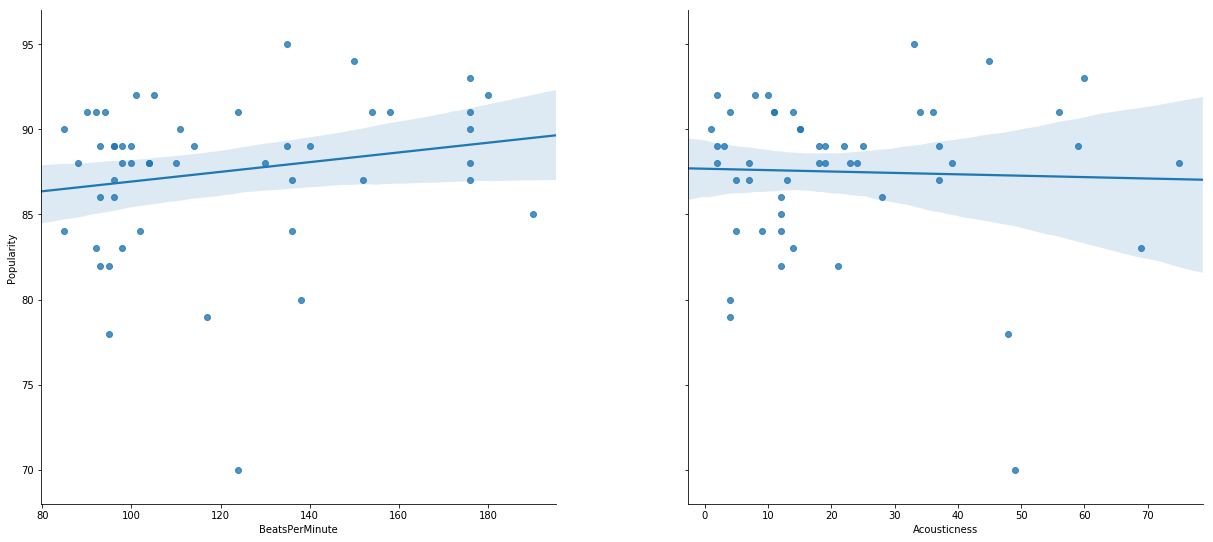

In [22]:
# features such as BeatsPerMinute and Speechiness have higher correlation than others
# and features like Acousticness have very little correlation
figure = sns.pairplot(spotify, x_vars=['BeatsPerMinute','Acousticness'], y_vars=['Popularity'], kind='reg')
figure.fig.set_size_inches(20, 10)

## Data Pre-Processing

In [23]:
# Data cleaning (demonstrated in Stage 1)
# Clean columns - remove the dots from column names
spotify.columns = spotify.columns.str.replace('.','')

In [24]:
spotify.info ()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 14 columns):
Unnamed: 0        50 non-null int64
TrackName         50 non-null object
ArtistName        50 non-null object
Genre             50 non-null object
BeatsPerMinute    50 non-null int64
Energy            50 non-null int64
Danceability      50 non-null int64
LoudnessdB        50 non-null int64
Liveness          50 non-null int64
Valence           50 non-null int64
Length            50 non-null int64
Acousticness      50 non-null int64
Speechiness       50 non-null int64
Popularity        50 non-null int64
dtypes: int64(11), object(3)
memory usage: 5.5+ KB


In [25]:
# remove column "Unnamed: 0" as it is not useful for further steps
spotify.drop("Unnamed: 0", axis = 1, inplace = True)

In [26]:
spotify.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 13 columns):
TrackName         50 non-null object
ArtistName        50 non-null object
Genre             50 non-null object
BeatsPerMinute    50 non-null int64
Energy            50 non-null int64
Danceability      50 non-null int64
LoudnessdB        50 non-null int64
Liveness          50 non-null int64
Valence           50 non-null int64
Length            50 non-null int64
Acousticness      50 non-null int64
Speechiness       50 non-null int64
Popularity        50 non-null int64
dtypes: int64(10), object(3)
memory usage: 5.2+ KB


In [27]:
# delete the track name of "0.958333333333333"
delete_row = spotify[spotify["TrackName"]== '0.958333333333333'].index
spotify = spotify.drop(delete_row)

In [28]:
spotify.head(50)

,TrackName,ArtistName,Genre,BeatsPerMinute,Energy,Danceability,LoudnessdB,Liveness,Valence,Length,Acousticness,Speechiness,Popularity
0,Señorita,Shawn Mendes,canadian pop,117,55,76,-6,8,75,191,4,3,79
1,China,Anuel AA,reggaeton flow,105,81,79,-4,8,61,302,8,9,92
2,boyfriend (with Social House),Ariana Grande,dance pop,190,80,40,-4,16,70,186,12,46,85
3,Beautiful People (feat. Khalid),Ed Sheeran,pop,93,65,64,-8,8,55,198,12,19,86
4,Goodbyes (Feat. Young Thug),Post Malone,dfw rap,150,65,58,-4,11,18,175,45,7,94
5,I Don't Care (with Justin Bieber),Ed Sheeran,pop,102,68,80,-5,9,84,220,9,4,84
6,Ransom,Lil Tecca,trap music,180,64,75,-6,7,23,131,2,29,92
7,How Do You Sleep?,Sam Smith,pop,111,68,48,-5,8,35,202,15,9,90
8,Old Town Road - Remix,Lil Nas X,country rap,136,62,88,-6,11,64,157,5,10,87
9,bad guy,Billie Eilish,electropop,135,43,70,-11,10,56,194,33,38,95


In [29]:
# make sure no missing values in any of the column
spotify.isnull().sum()

TrackName         0
ArtistName        0
Genre             0
BeatsPerMinute    0
Energy            0
Danceability      0
LoudnessdB        0
Liveness          0
Valence           0
Length            0
Acousticness      0
Speechiness       0
Popularity        0
dtype: int64

## Model Training 

In [30]:
# Importing library for Train Test split. 
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn import metrics
from sklearn.svm import SVR
from sklearn.ensemble import RandomForestRegressor
from sklearn.preprocessing import StandardScaler

In [31]:
# Creating the Features and Targets datasets. 
X=spotify.loc[:,['Energy','Danceability','Length','LoudnessdB','Acousticness']].values
y=spotify.loc[:,'Popularity'].values

In [32]:
# Creating a test and training dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=42)

In [33]:
# Creating the scaler object
scaler = StandardScaler()

In [34]:
# Scaling the Training and Testing Data. 
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [35]:
# Checking the Training data. 
X_train

array([[-0.0743478 ,  0.2306647 , -1.80335858, -0.12216944, -1.07321441],
       [ 0.20652167,  0.3875167 , -0.83319732, -0.12216944, -1.14325143],
       [-1.82978196, -1.18100329,  0.2582341 , -0.12216944,  1.37808145],
       [ 0.9789127 , -0.23989129,  0.20972604,  1.43549097,  0.11741501],
       [-1.40847776, -0.16146529,  1.34966552, -0.64138958, -0.37284416],
       [-1.54891249, -0.16146529, -0.27535459, -2.71827014,  1.09793336],
       [-0.00413043,  0.2306647 ,  0.91309295, -0.12216944, -0.16273309],
       [-1.40847776, -0.39674329, -0.25110056, -2.71827014,  0.53763716],
       [ 1.61086899,  0.3875167 ,  0.45226635,  0.39705069,  0.11741501],
       [-0.98717356, -3.37693128,  0.11270991, -1.16060972, -0.37284416],
       [-0.7063041 ,  0.3090907 , -0.34811669, -0.12216944, -0.93314036],
       [ 0.27673903,  1.2502027 , -1.0514836 ,  0.91627083,  1.5181555 ],
       [-0.42543463,  0.6227947 , -0.1298304 , -0.64138958, -1.07321441],
       [ 0.20652167,  0.6227947 ,  0.3

In [36]:
# Checking the dimensions of the training and testing sets. 
print("Training Feature data : ", X_train.shape)
print("Training Feature data : ", X_test.shape)
print("Training Feature data : ", y_train.shape)
print("Testing Target data : ", y_test.shape)

Training Feature data :  (34, 5)
Training Feature data :  (15, 5)
Training Feature data :  (34,)
Testing Target data :  (15,)


In [37]:
# Linear regression
# create object
regressor = LinearRegression()
# fit the model
regressor.fit(X_train, y_train)
# expected mean value of Y when all X=0
print(regressor.intercept_)
# Checking the model coefficients. 
print(regressor.coef_)

87.58823529411765
[ 0.99159611 -0.1956929  -0.30810466 -0.68739241  0.60001334]


In [38]:
#Displaying the difference between the actual and the predicted
y_pred = regressor.predict(X_test)
df_output = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})
print(df_output)

    Actual  Predicted
0       87     86.149
1       88     88.034
2       88     88.361
3       88     85.865
4       91     88.403
5       89     87.457
6       83     89.235
7       70     89.623
8       89     89.012
9       91     86.365
10      88     88.934
11      94     88.560
12      89     88.943
13      87     87.058
14      86     88.337


In [39]:
#Checking the accuracy of Linear Regression
lr_mse = metrics.mean_squared_error(y_test, y_pred)

print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))
print('Mean Squared Error:', lr_mse)
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

Mean Absolute Error: 3.123328816685441
Mean Squared Error: 33.05958061973163
Root Mean Squared Error: 5.749746135242114


Text(0, 0.5, 'Test values')

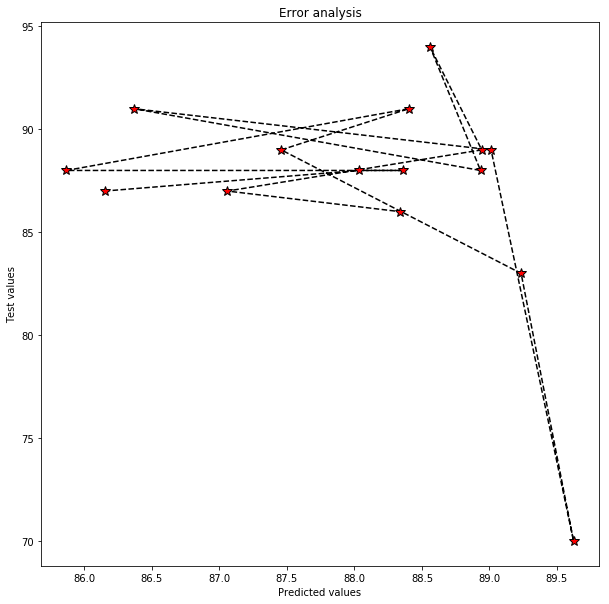

In [40]:
plt.figure(figsize=(10,10))
plt.plot(y_pred,y_test,color='black',linestyle='dashed',marker='*',markerfacecolor='red',markersize=10)
plt.title('Error analysis')
plt.xlabel('Predicted values')
plt.ylabel('Test values')

In [41]:
# random forest regression
# create object
rfr = RandomForestRegressor(n_estimators=100)
# fit the model
rfr.fit(X_train, y_train)
#Displaying the difference between the actual and the predicted
y_pred=rfr.predict(X_test)
df_output = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})
print(df_output)

    Actual  Predicted
0       87      89.29
1       88      87.72
2       88      87.18
3       88      89.15
4       91      86.77
5       89      87.52
6       83      83.75
7       70      87.77
8       89      88.96
9       91      89.57
10      88      87.06
11      94      88.03
12      89      88.59
13      87      85.26
14      86      88.46


In [42]:
#Checking the accuracy of random forest regression
rfr_mse = metrics.mean_squared_error(y_test, y_pred)

print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))
print('Mean Squared Error:', rfr_mse)
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

Mean Absolute Error: 2.7840000000000003
Mean Squared Error: 26.103626666666663
Root Mean Squared Error: 5.109170839448086


Text(0, 0.5, 'Test values')

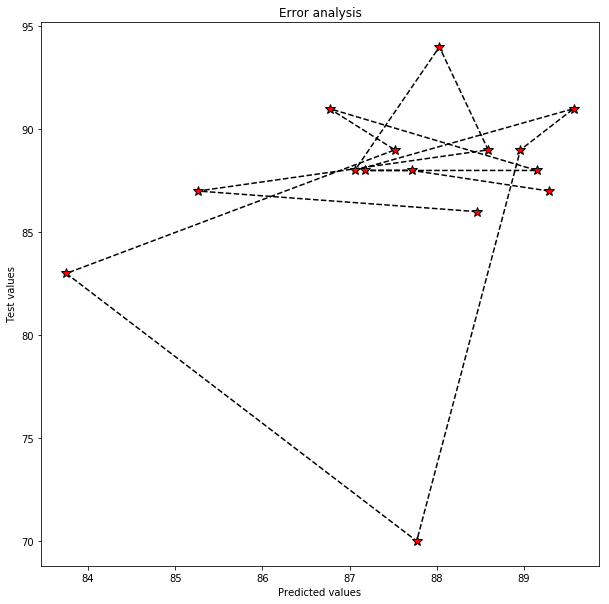

In [43]:
plt.figure(figsize=(10,10))
plt.plot(y_pred,y_test,color='black',linestyle='dashed',marker='*',markerfacecolor='red',markersize=10)
plt.title('Error analysis')
plt.xlabel('Predicted values')
plt.ylabel('Test values')

In [44]:
# support vector regression 
svr=SVR(kernel='rbf', gamma='scale')
svr.fit(X_train, y_train)
y_pred=svr.predict(X_test)
df_output = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})
print(df_output)

    Actual  Predicted
0       87     89.040
1       88     88.487
2       88     88.545
3       88     88.701
4       91     88.138
5       89     87.733
6       83     88.328
7       70     88.467
8       89     88.747
9       91     88.730
10      88     88.527
11      94     88.427
12      89     89.106
13      87     88.942
14      86     88.715


In [45]:
#Checking the accuracy of SVR
svr_mse = metrics.mean_squared_error(y_test, y_pred)

print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))
print('Mean Squared Error:', svr_mse)
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

Mean Absolute Error: 3.005522459708703
Mean Squared Error: 28.807881510375662
Root Mean Squared Error: 5.367297412141017


Text(0, 0.5, 'Test values')

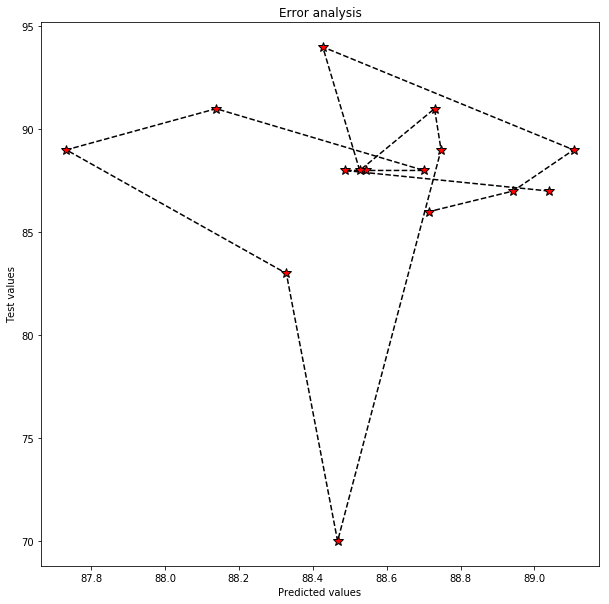

In [46]:
plt.figure(figsize=(10,10))
plt.plot(y_pred,y_test,color='black',linestyle='dashed',marker='*',markerfacecolor='red',markersize=10)
plt.title('Error analysis')
plt.xlabel('Predicted values')
plt.ylabel('Test values')

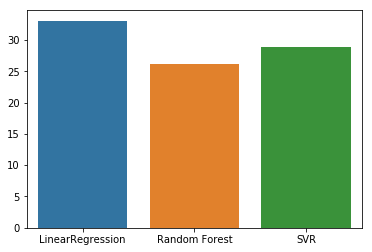

In [47]:
# Comparison of the mean squared error of each model
sns.barplot(x=['LinearRegression', 'Random Forest', 'SVR'], y=[lr_mse, rfr_mse, svr_mse])
plt.show()

## Evaluation

In [48]:
from sklearn.model_selection import KFold

In [49]:
kf = KFold(n_splits=10)

In [58]:
for training_indices, test_indices in kf.split(X):
#     print(training_indices , test_indices)
    X_train = X[training_indices]
    Y_train = y[training_indices]
    
    X_test = X[test_indices]
    Y_test = y[test_indices]
    m = rfr
    m.fit(X_train,Y_train)
    print(m.score(X_test,Y_test))

-0.6204236694677883
-0.27114890710382644
-2.5083685567010297
-0.2719545454545451
0.0012208333333317833
-0.3247137533875344
-1.0696899999999974
-0.055159609120520425
0.39826041666666545
-1.14978888888889


In [59]:
m.score(X,y)

0.7758613008029137

## Conclusion

Since the result of data training and testing are unstable during each run, thereby the perfomance of regression model displayed on bar chart in Stage 4 is also unstable.
<br> 
However, Random Forest Regression always has the lowest mean squared error value during every runs. Therefore, Random Forest Regression is considered as the most suitable model for data training and testing compared to others.
<br>
By using Random Forest Regression for evaluation, the average score for data training and evaluating is 77.